Dataset with students data extracted from Unir archive.  
Geodataframes extracted from the openlibraries https://datosabiertos.esri.co/ and https://sites.google.com/site/seriescol/shapes  
The file 'geodata.shp' was generated from previous chapter.  
Homicide: Data from https://es.wikipedia.org/wiki/Anexo:Departamentos_y_municipios_de_Colombia_por_tasa_de_homicidio_intencional  
Cocain: Data from http://www.odc.gov.co/sidco/oferta/cultivos-ilicitos/departamento-municipio

# Libraries and datasets loading

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Default plot size is set.
plt.rcParams['figure.figsize'] = [15, 15]

# Geodataframes and dataset are loaded.
geodata = gpd.read_file('geodata.gpkg')
gdf_dep = gpd.read_file('depto.shp')

In [2]:
geodata.head()

DPTO              DEPARTAMENTO          AREA    PERIMETER      HECTARES  \
0   91                  AMAZONAS  1.100294e+11  2562641.642  1.100294e+07   
1   95                  GUAVIARE  5.567148e+10  1555059.349  5.567148e+06   
2   85                  CASANARE  4.471409e+10  1101844.910  4.471409e+06   
3   27                     CHOCO  4.683852e+10  1797897.873  4.683852e+06   
4   88  SAN ANDRES Y PROVIDENCIA  4.960252e+07    71946.251  4.960252e+03   

   Cases_Frequency  Cases_Order_Value        NUMERO   ESTRATO       EDAD  ...  \
0                1                  0  12080.000000  2.000000  41.000000  ...   
1                2                  1   7904.500000  4.000000  24.000000  ...   
2                3                  2   8900.000000  2.666667  27.666667  ...   
3                6                  3  11630.500000  2.000000  38.166667  ...   
4                7                  4  12222.714286  2.285714  31.714286  ...   

   COMP_FLEXIBLE  IDIOMA_EXT    QUIMICA     FISICA  MATEMATICAS  \
0            NaN   48.000000  44.000000  46.000000    42.000000   
1            3.0   39.000000  43.000000  51.000000    46.000000   
2            NaN   46.000000  46.783333  41.113333    51.936667   
3            5.0   39.410000  40.760000  42.246000    43.787500   
4            NaN   51.686667  40.832857  41.408571    42.430000   

   RAZ_CUANTITATIVO  APTITUD_MATEMATICA  CONOCIM_MATEMATICOS  \
0               NaN                 NaN                  NaN   
1               NaN                 NaN                  NaN   
2               NaN                 NaN                  NaN   
3               NaN                41.5                 39.0   
4               NaN                42.0                 57.0   

   ULT_SEMESTRE_CURSADO                                           geometry  
0                  7.00  POLYGON ((1300074.955 504576.022, 1301222.910 ...  
1                  5.00  POLYGON ((1313267.569 805589.040, 1313847.891 ...  
2                  7.00  POLYGON ((1432862.966 1183947.874, 1433379.527...  
3                  2.75  POLYGON ((675910.420 1407355.341, 676737.654 1...  
4                  4.00  MULTIPOLYGON (((168440.793 1896450.410, 168454...  

[5 rows x 40 columns]

In [3]:
def plot_map (social_issue, cmap):
    fig, ax = plt.subplots()
    gdf_dep.plot(color='lightgrey', edgecolor='white', ax=ax)
    geodata.plot(column=social_issue, cmap=cmap, edgecolor='white', legend=True, ax=ax)
    plt.title(social_issue)
    plt.savefig("./socioeconomic_maps/" + social_issue + ".jpg")

# 1.- Socieconomic data

In [4]:
# Merge geodata with population and social data
df_population = pd.read_csv('poblacion.csv')
geodata = geodata.merge(df_population, on='DEPARTAMENTO') 

# Merge geodata with homicide and criminology data
df_hom = pd.read_csv('homicidios2016.csv')
geodata = geodata.merge(df_hom, on='DEPARTAMENTO') 

# Merge geodata with cocain plantation data
df_coc = pd.read_csv('coca2018.csv')
geodata = geodata.merge(df_coc, on='DEPARTAMENTO', how='outer')  # Merge geodata with coca data

In [9]:
socioeconomic = ['ESTRATO', 'EDAD',
'INGRESO_FAMILIAR','viviendas con ocupantes ausentes', 'viviendas de uso temporal',
'viviendas desocupadas', 'viviendas con personas presentes',
'viviendas', 'hogares', 'poblacion', 'numero homicidios 2016',
'tasa homicidios 2016', 'coca (hectareas)']

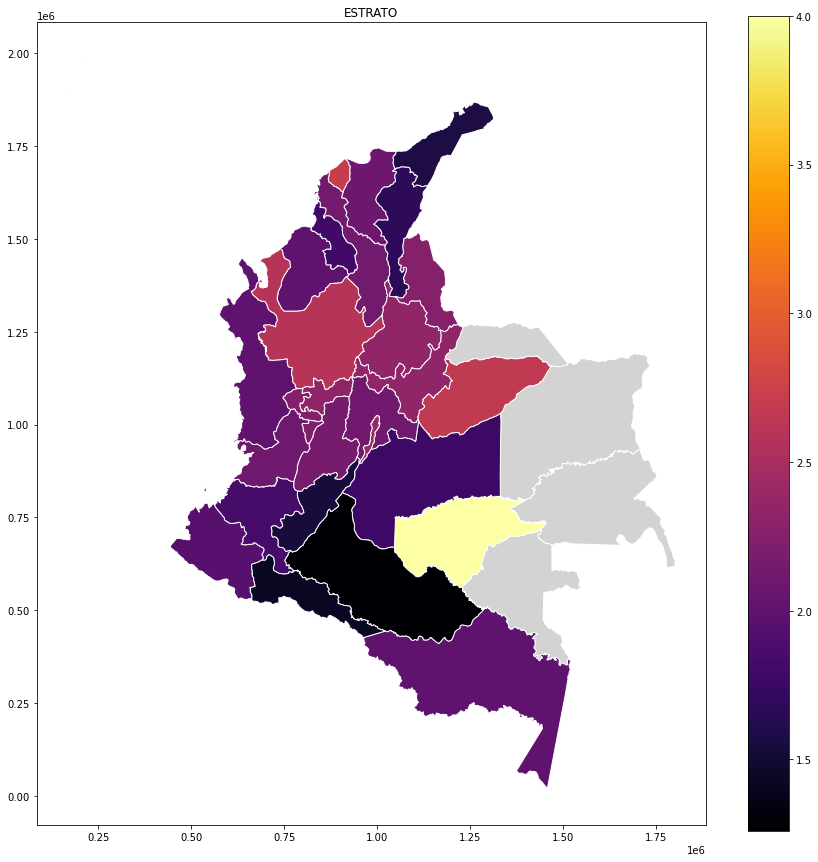

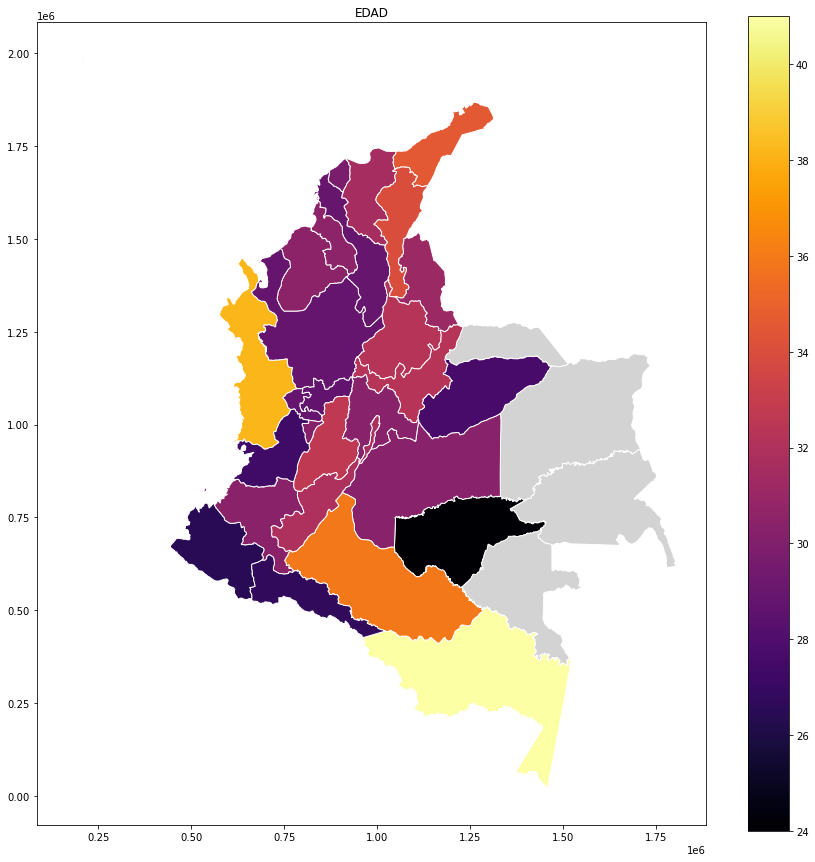

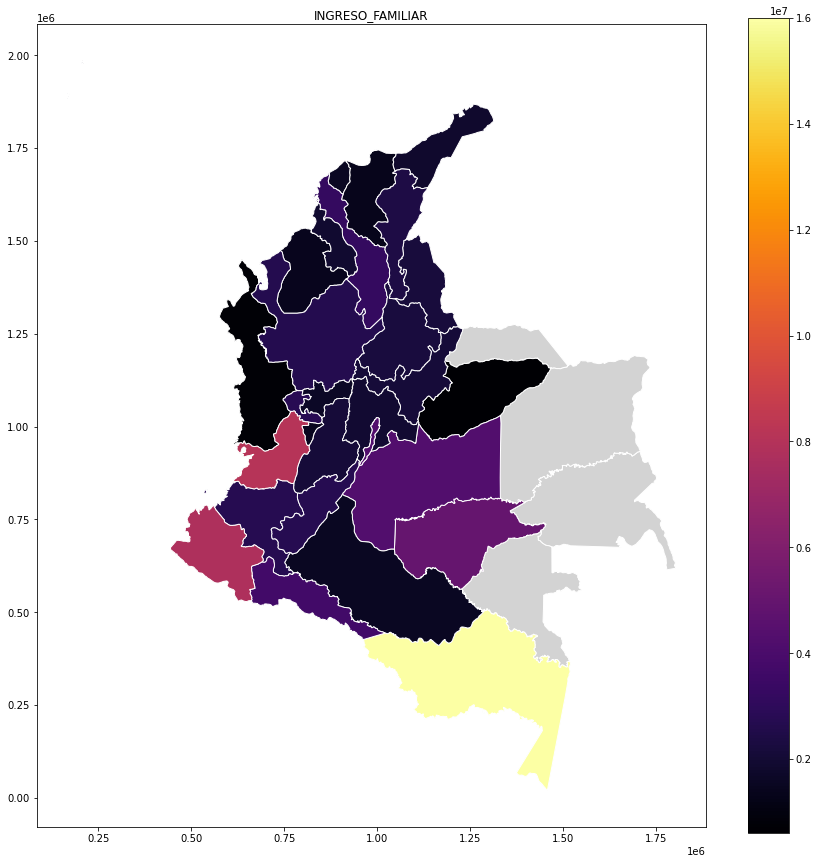

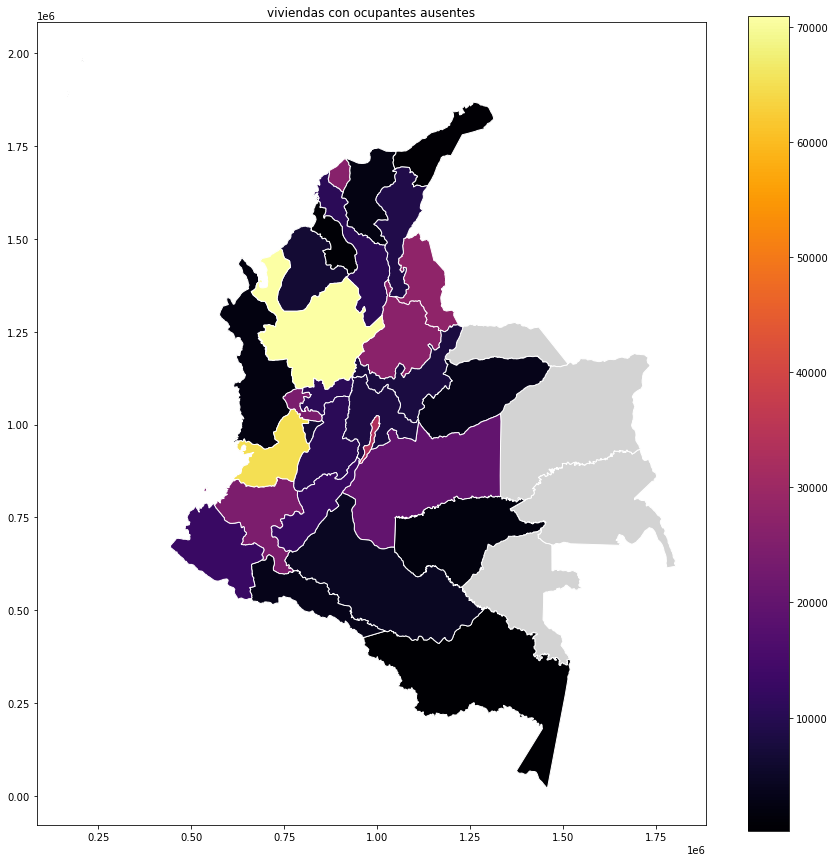

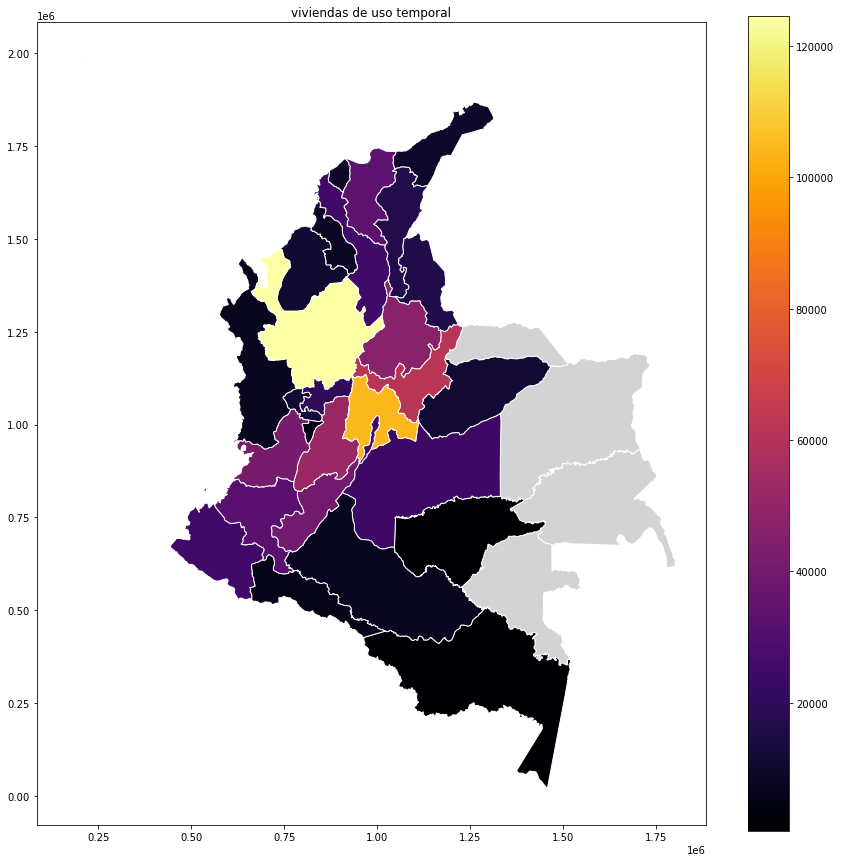

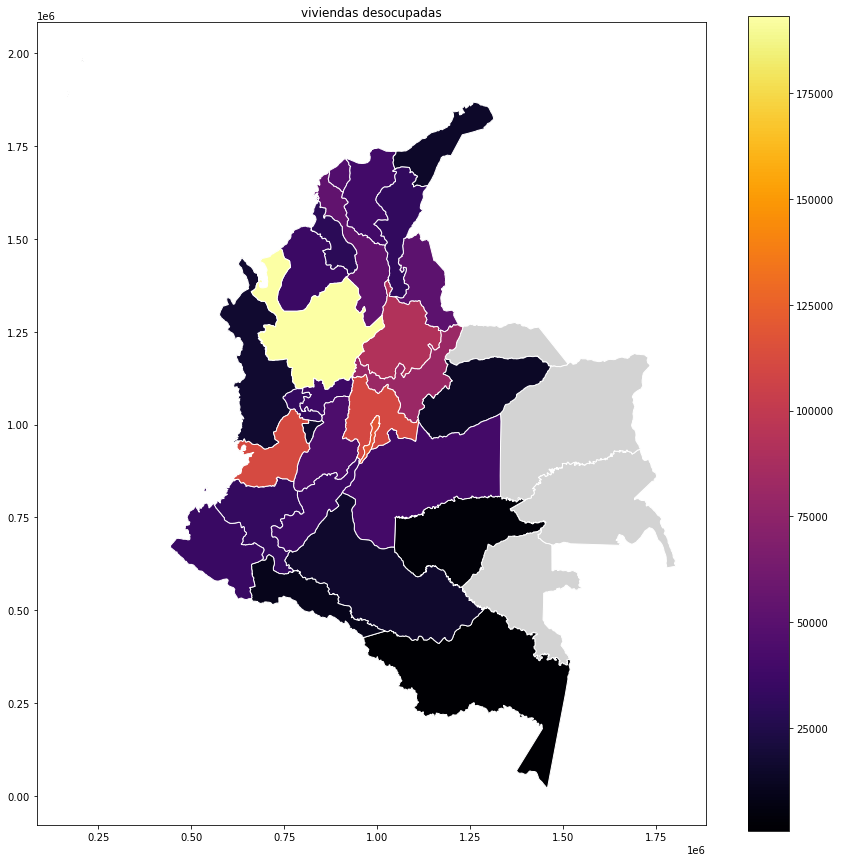

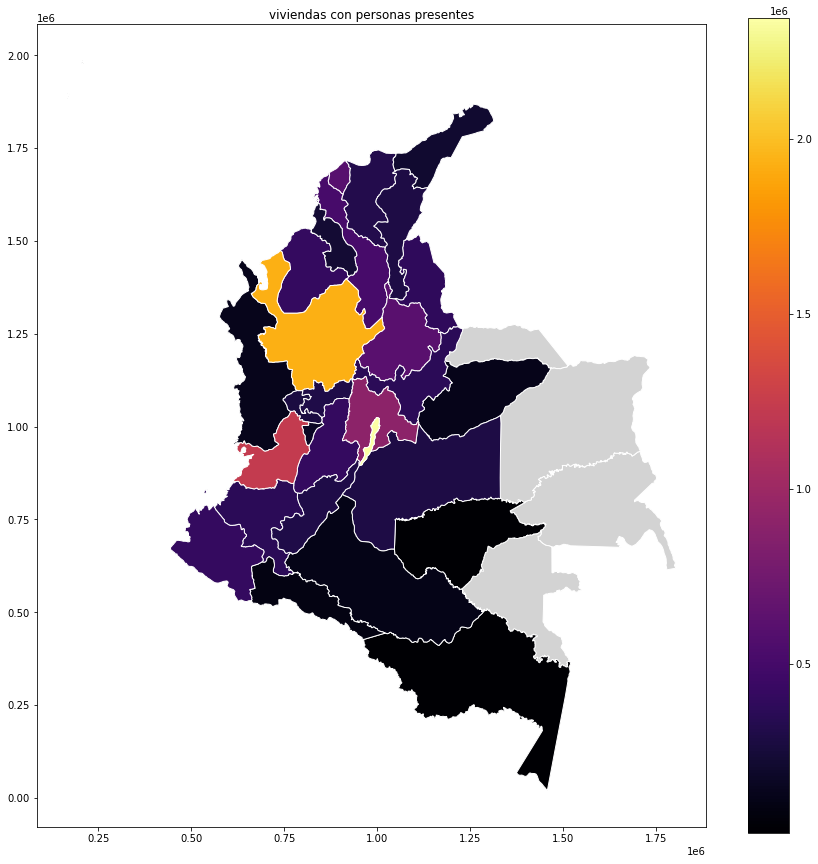

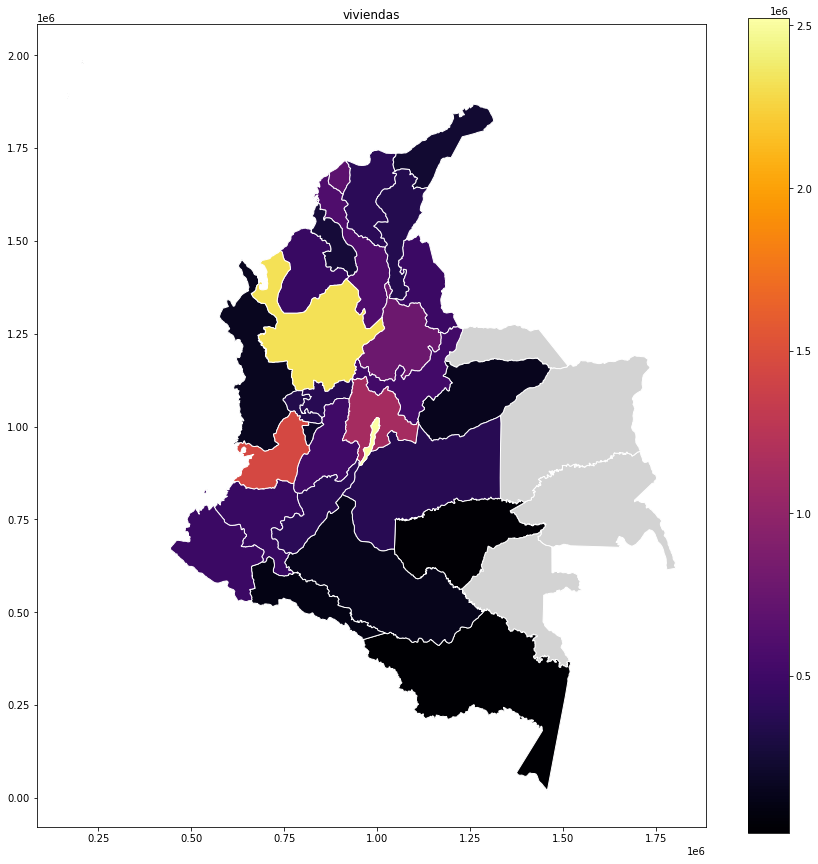

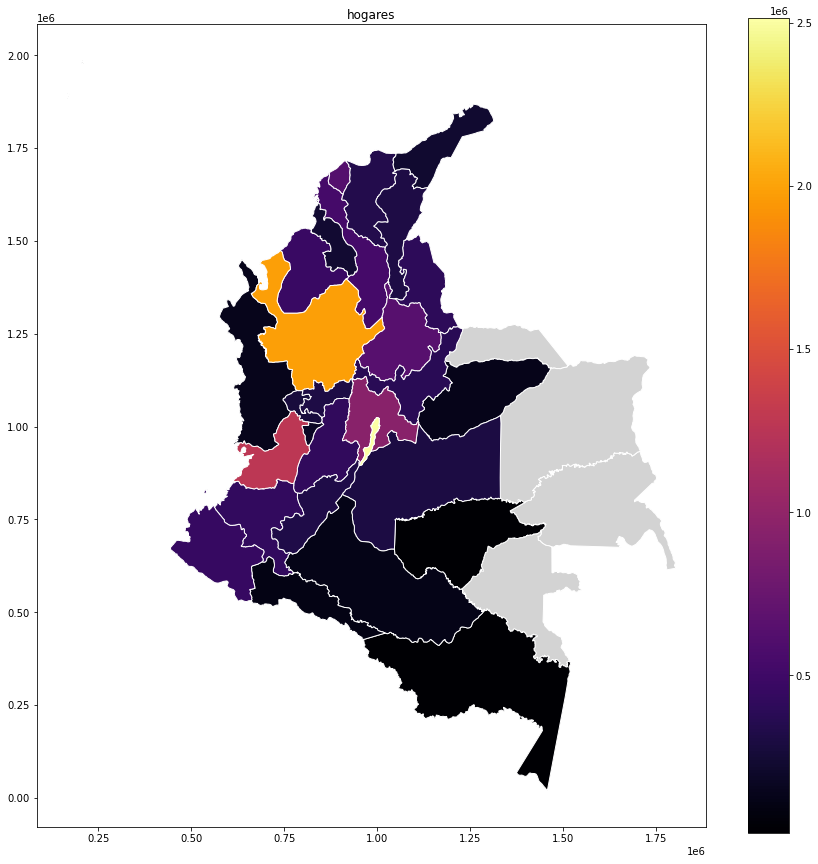

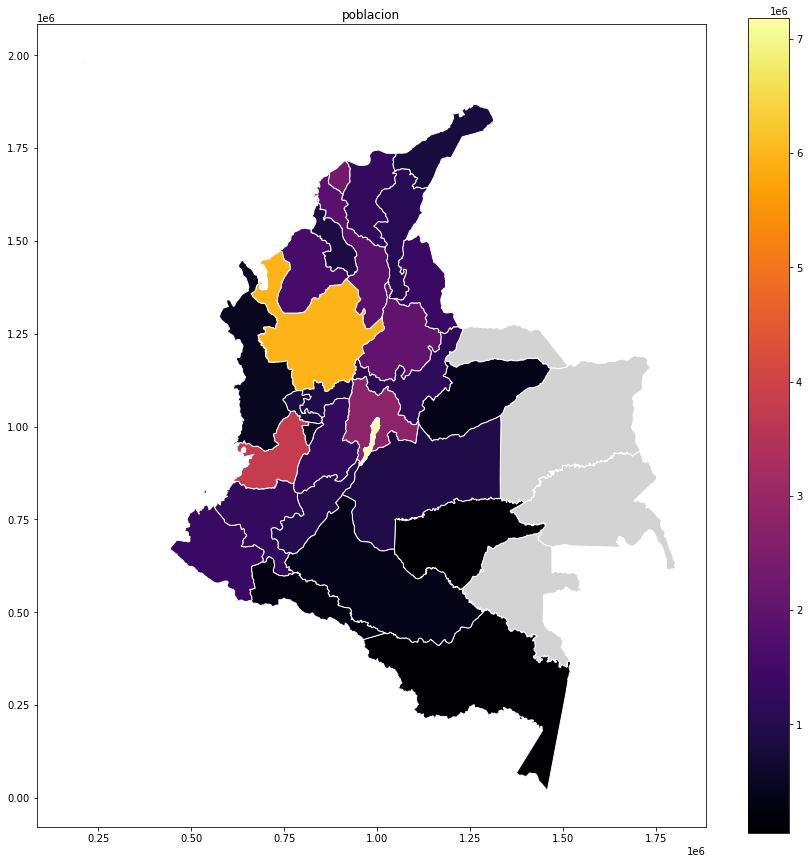

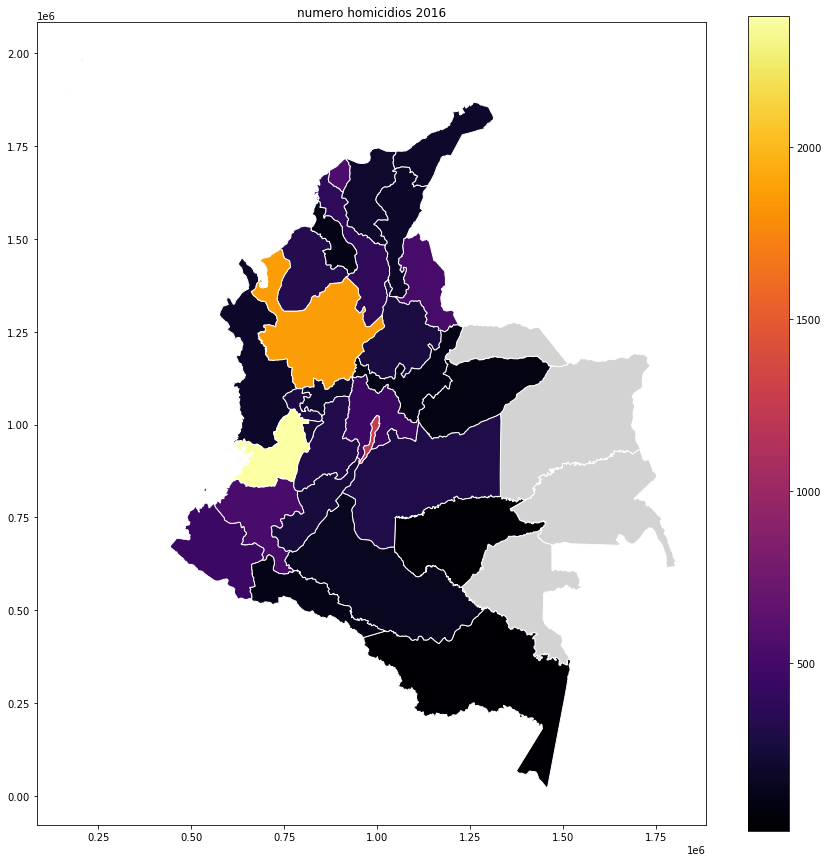

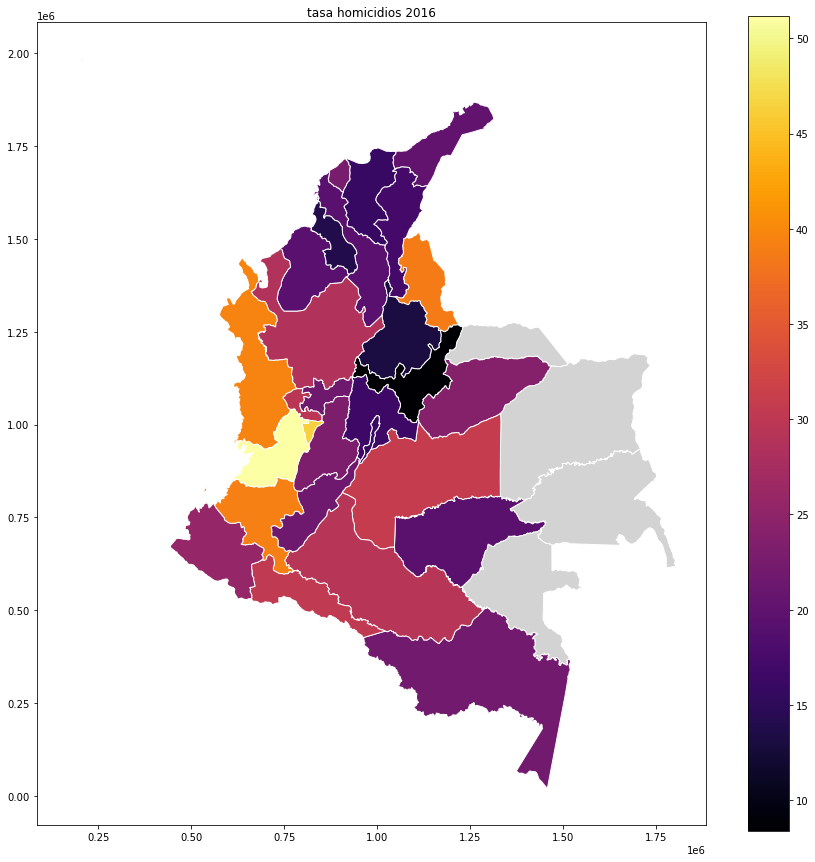

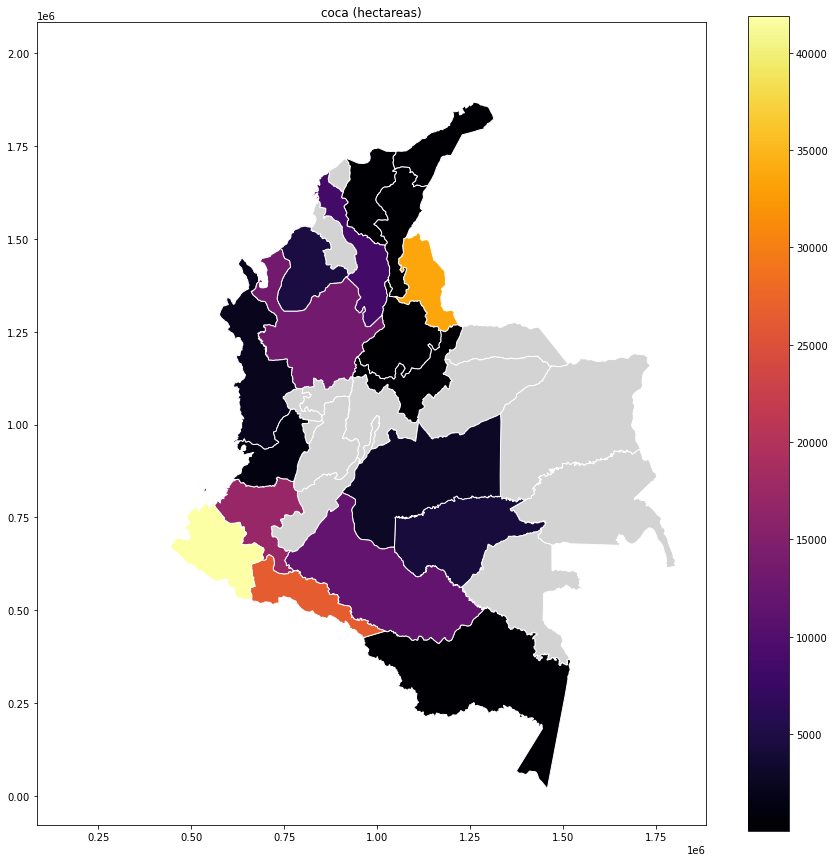

In [10]:
for issue in socioeconomic:
    plot_map(issue, 'inferno')

In [11]:
geodata

DPTO              DEPARTAMENTO          AREA    PERIMETER      HECTARES  \
0    91                  AMAZONAS  1.100294e+11  2562641.642  1.100294e+07   
1    95                  GUAVIARE  5.567148e+10  1555059.349  5.567148e+06   
2    85                  CASANARE  4.471409e+10  1101844.910  4.471409e+06   
3    27                     CHOCO  4.683852e+10  1797897.873  4.683852e+06   
4    88  SAN ANDRES Y PROVIDENCIA  4.960252e+07    71946.251  4.960252e+03   
5    08                 ATLANTICO  3.360765e+09   240936.172  3.360765e+05   
6    23                   CORDOBA  2.505949e+10   814093.372  2.505949e+06   
7    47                 MAGDALENA  2.284639e+10   916642.470  2.284639e+06   
8    44                   GUAJIRA  2.101235e+10   936598.020  2.101235e+06   
9    63                   QUINDIO  1.732026e+09   207948.857  1.732026e+05   
10   50                      META  8.538969e+10  1680541.812  8.538969e+06   
11   13                   BOLIVAR  2.614189e+10  1309427.968  2.614189e+06   
12   70                     SUCRE  1.082379e+10   688869.681  1.082379e+06   
13   54        NORTE DE SANTANDER  2.144333e+10   914288.244  2.144333e+06   
14   68                 SANTANDER  3.029022e+10  1036566.662  3.029022e+06   
15   17                    CALDAS  7.558200e+09   603282.457  7.558200e+05   
16   15                    BOYACA  2.335258e+10  1364539.911  2.335258e+06   
17   66                 RISARALDA  4.042733e+09   436988.677  4.042733e+05   
18   73                    TOLIMA  2.342127e+10   853045.779  2.342127e+06   
19   05                 ANTIOQUIA  6.335186e+10  1963728.843  6.335186e+06   
20   18                   CAQUETA  9.018087e+10  1888506.901  9.018087e+06   
21   25              CUNDINAMARCA  2.280026e+10  1164175.024  2.280026e+06   
22   20                     CESAR  2.297310e+10  1080343.678  2.297310e+06   
23   19                     CAUCA  2.974279e+10  1243388.952  2.974279e+06   
24   76           VALLE DEL CAUCA  2.214683e+10   995449.434  2.214683e+06   
25   41                     HUILA  2.031870e+10   929144.166  2.031870e+06   
26   11                BOGOTA D.C  1.650948e+09   323322.540  1.650948e+05   
27   86                  PUTUMAYO  2.470768e+10  1194372.666  2.470768e+06   
28   52                    NARIÑO  3.328305e+10  1015680.966  3.328305e+06   

    Cases_Frequency  Cases_Order_Value        NUMERO   ESTRATO       EDAD  \
0                 1                  0  12080.000000  2.000000  41.000000   
1                 2                  1   7904.500000  4.000000  24.000000   
2                 3                  2   8900.000000  2.666667  27.666667   
3                 6                  3  11630.500000  2.000000  38.166667   
4                 7                  4  12222.714286  2.285714  31.714286   
5                 7                  5  19200.142857  2.714286  29.714286   
6                10                  6  10559.000000  2.000000  30.500000   
7                10                  7  22336.600000  2.100000  31.600000   
8                12                  8  18769.666667  1.583333  34.583333   
9                13                  9  12444.615385  2.230769  30.230769   
10               14                 10  11956.571429  1.785714  30.357143   
11               15                 11  11511.333333  2.133333  28.933333   
12               16                 12  13343.250000  1.812500  30.562500   
13               19                 13  11872.315789  2.263158  31.157895   
14               24                 14  13715.125000  2.333333  32.250000   
15               28                 15  12134.678571  2.321429  28.678571   
16               30                 16  14923.700000  2.333333  32.266667   
17               33                 17  11852.060606  2.242424  28.909091   
18               56                 18  16966.964286  2.160714  32.642857   
19               81                 19  10171.641975  2.592593  28.864198   
20               89                 20  18349

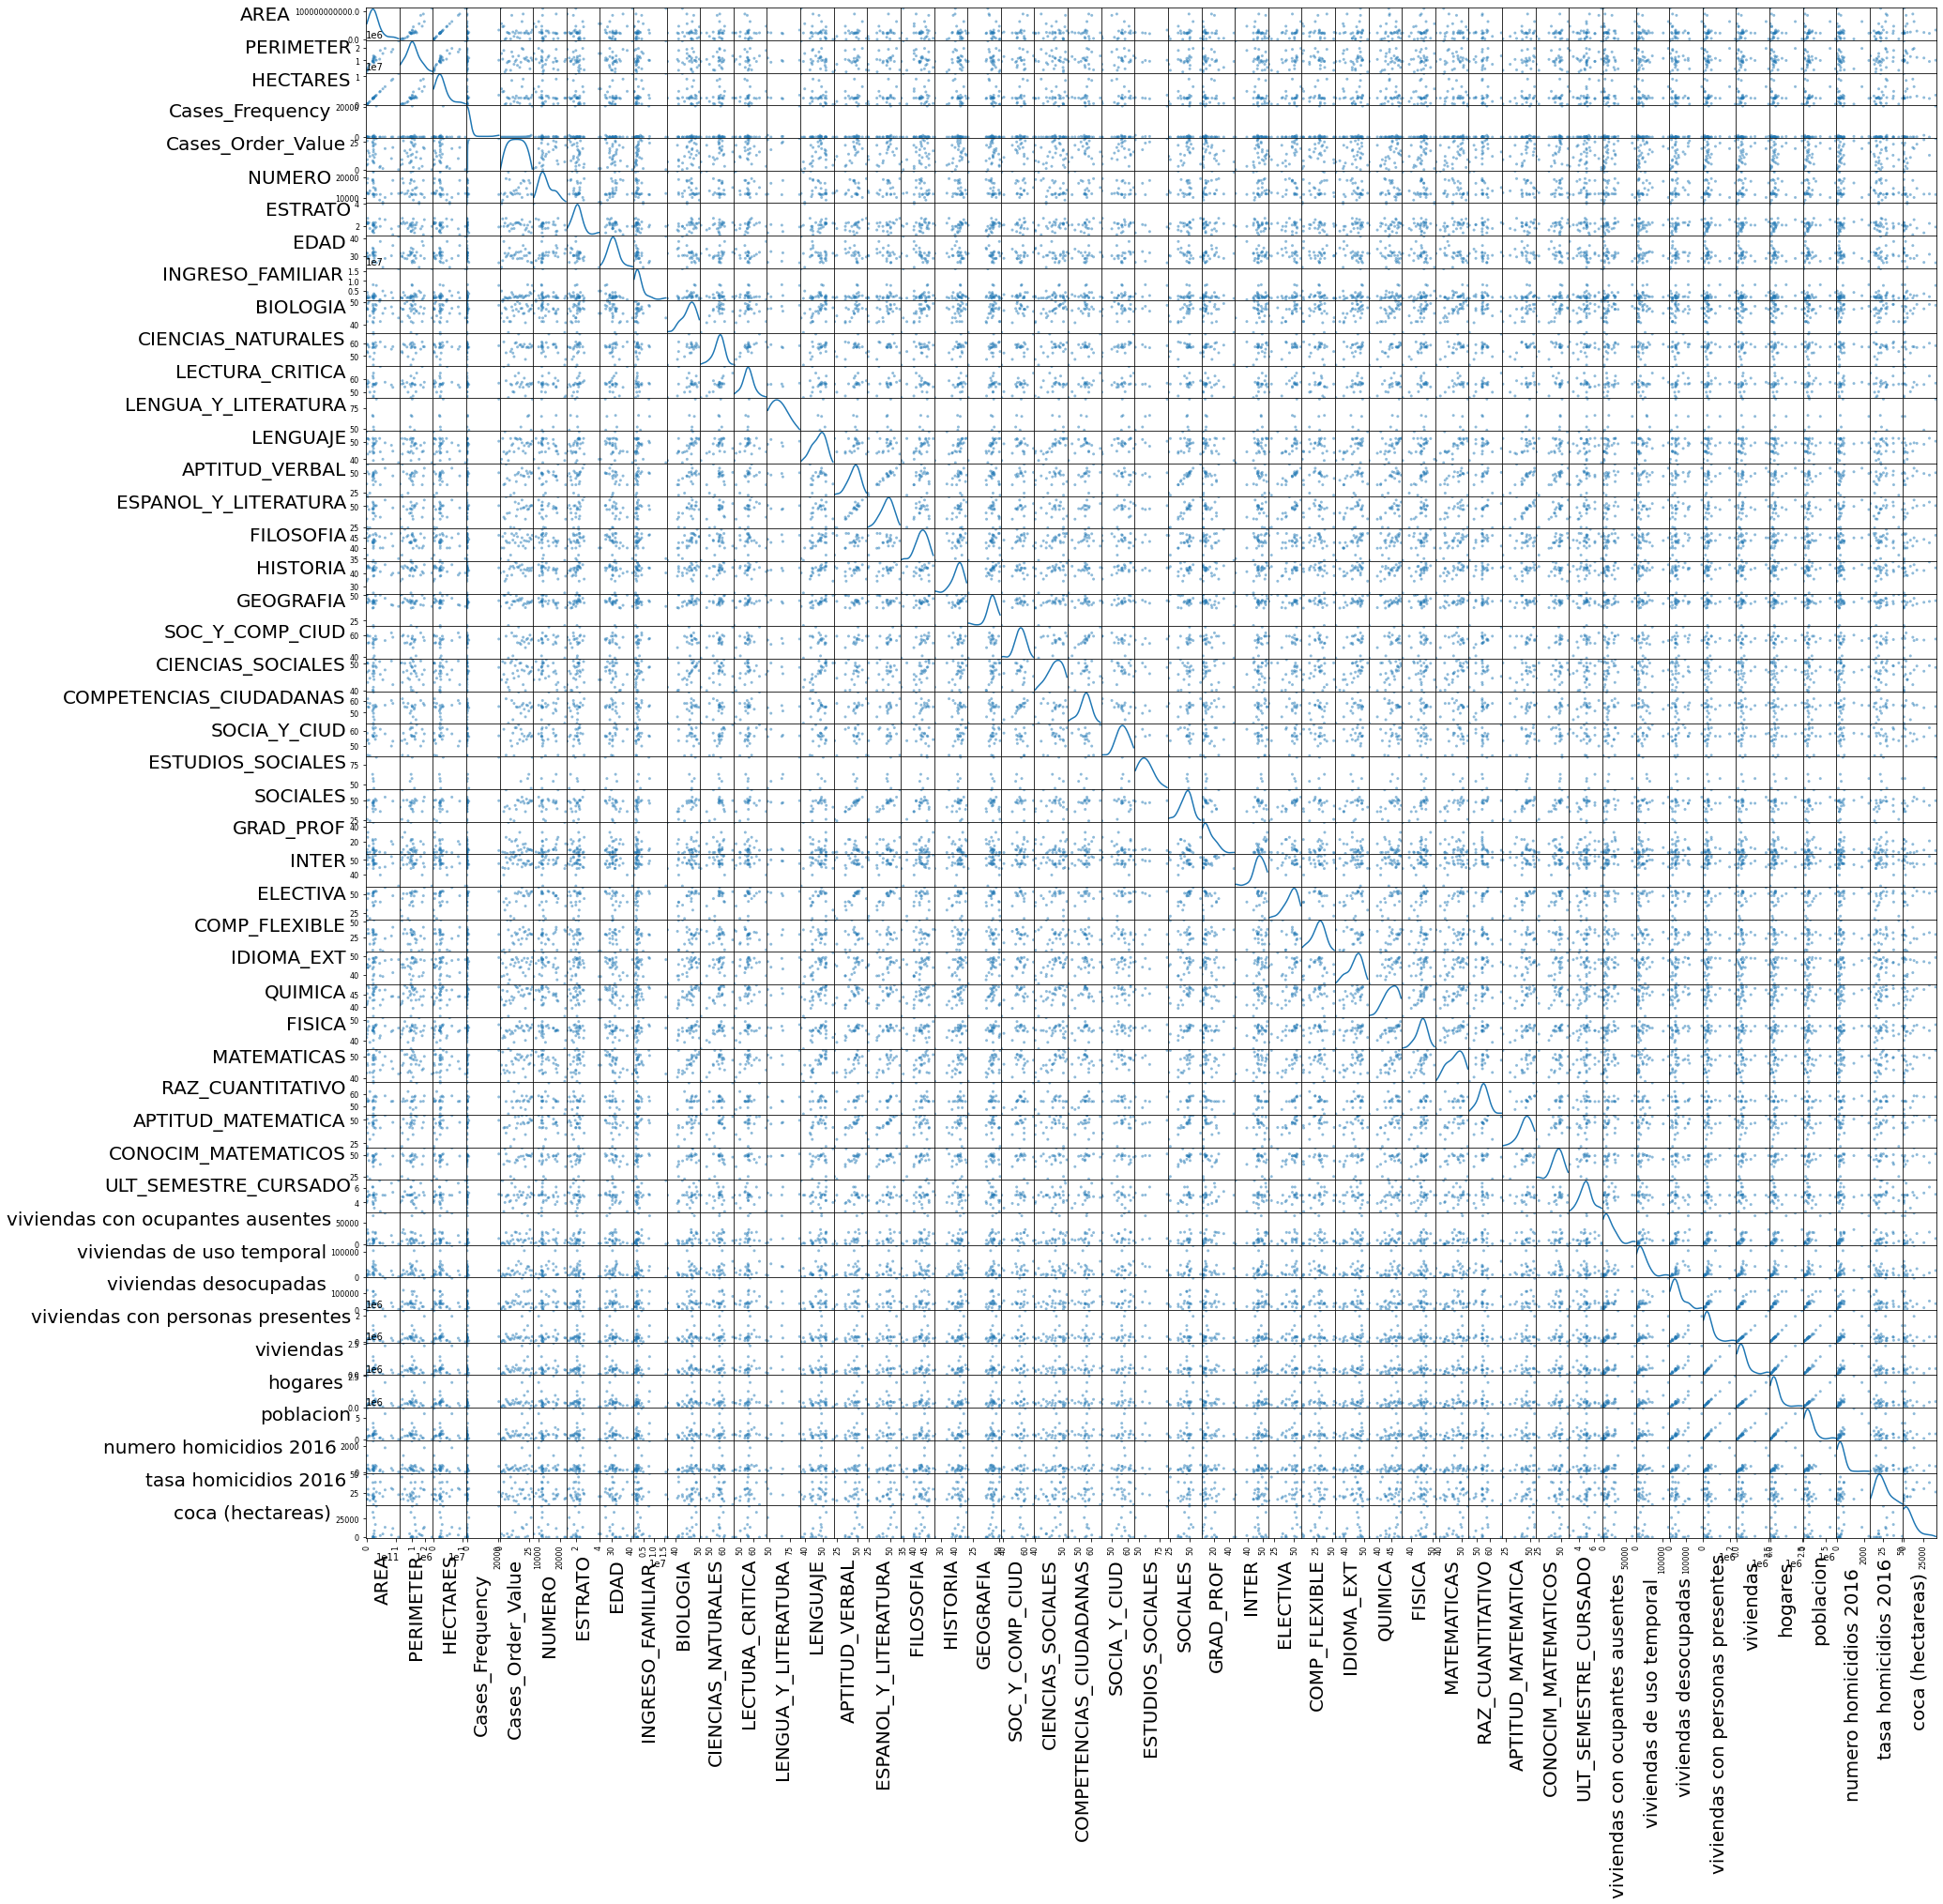

In [12]:
# Scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(
    geodata,
    figsize  = [30, 30],
    # marker   = ".",
    # s        = 0.2,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0, ha='right')
    
plt.savefig("scatter_matrix_WithGeodata.jpg")

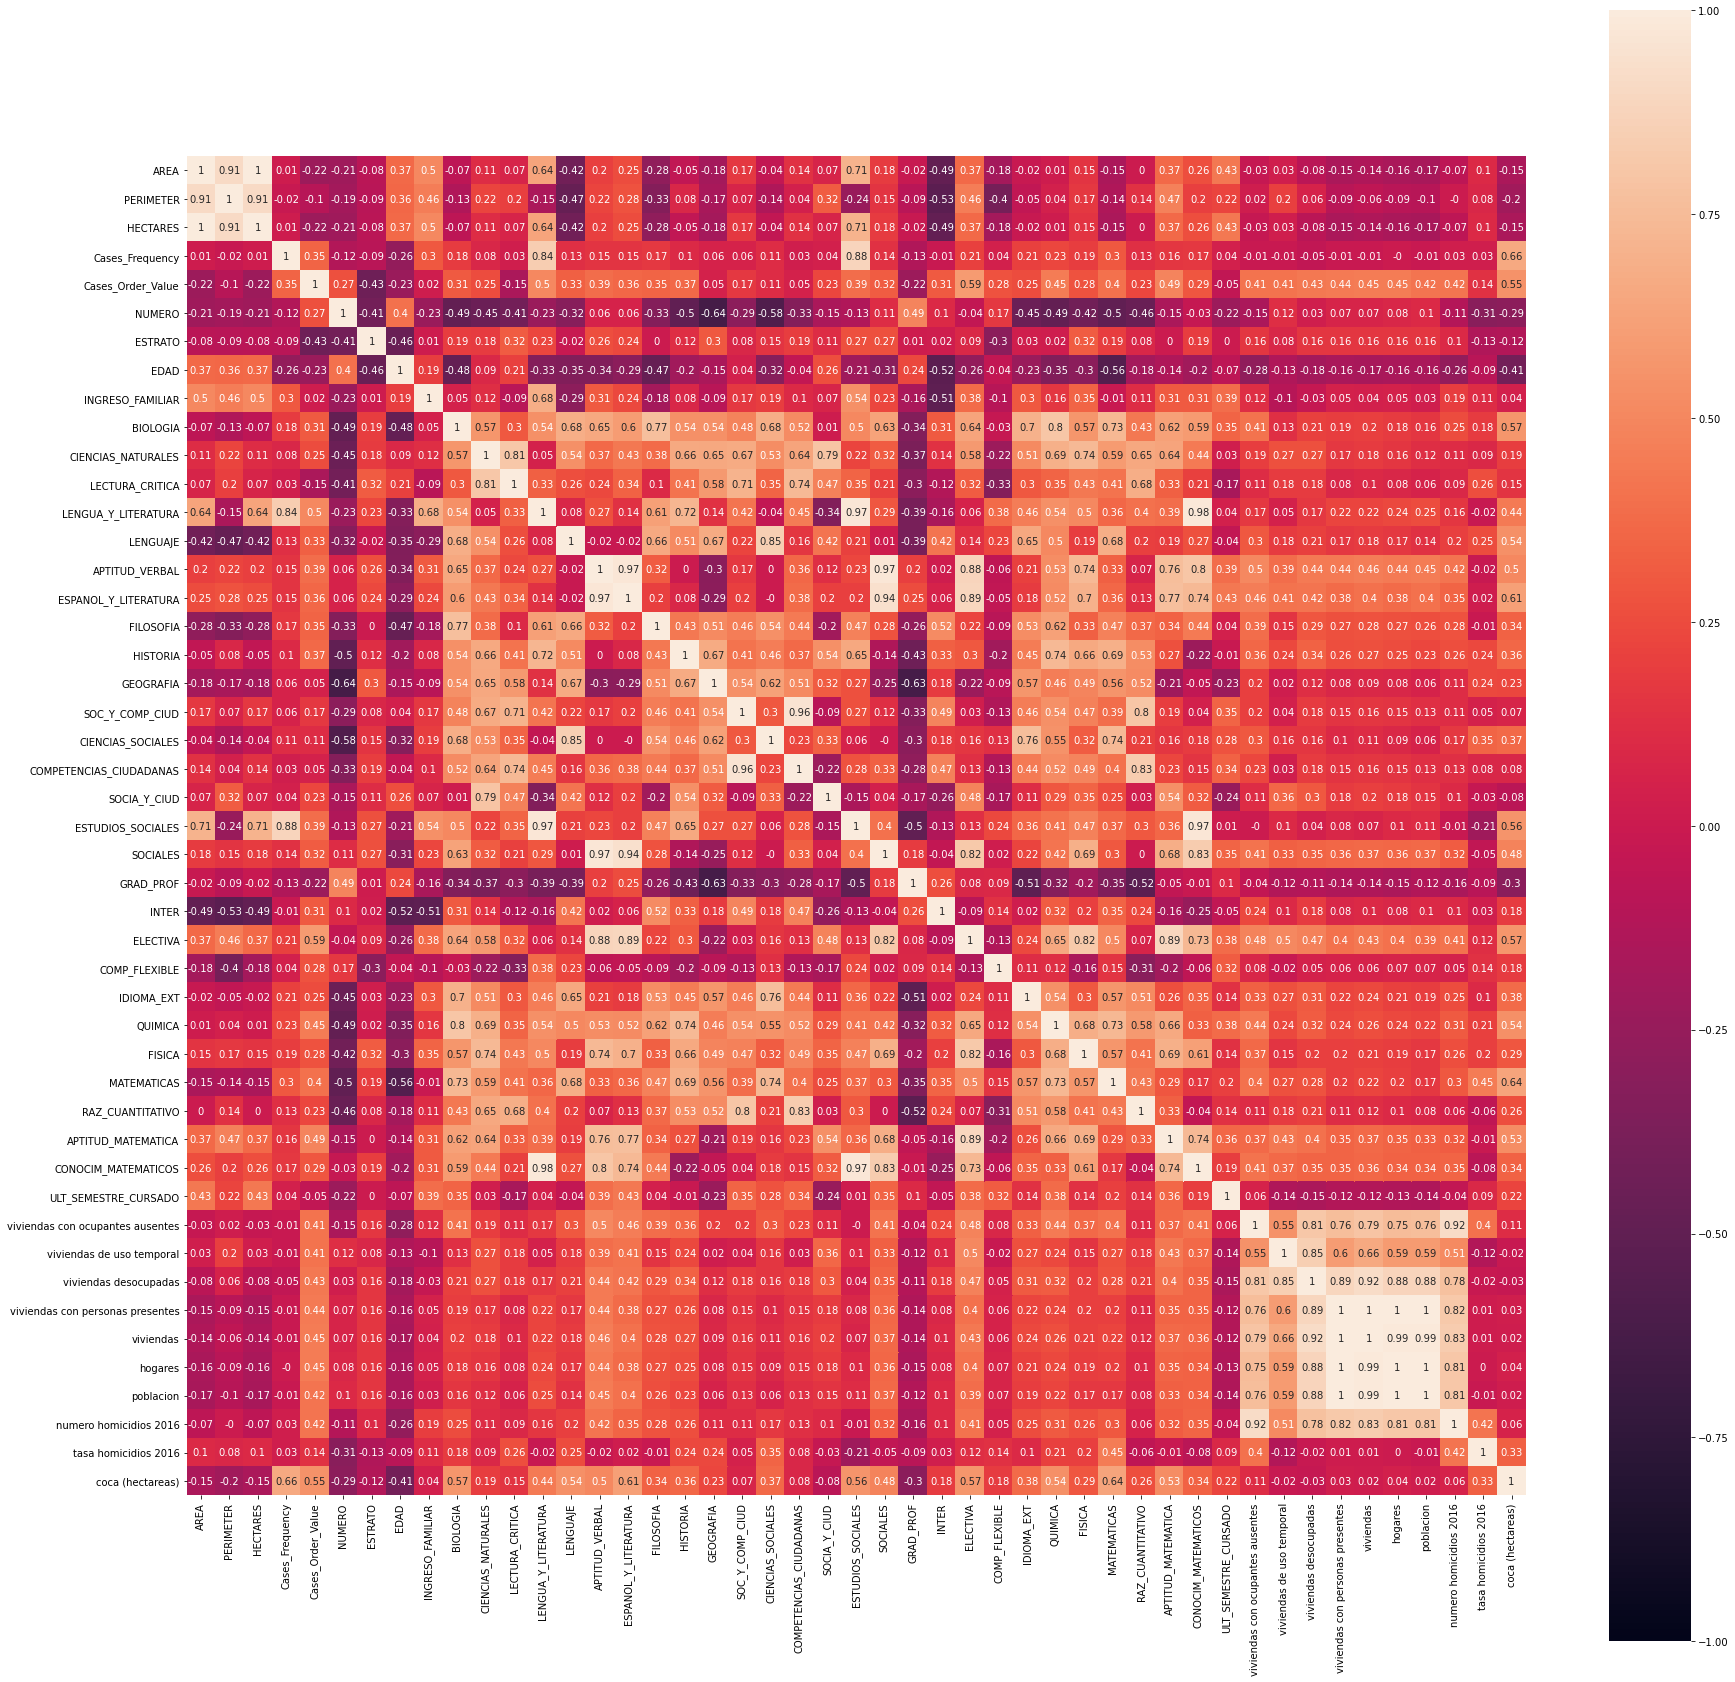

In [14]:
import seaborn as sb 

# Correlation matrix
corrMatrix = geodata.corr()

plt.rcParams['figure.figsize'] = 30, 30
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 
plt.savefig('correlation_matrix_WithGeodata.pdf') 

In [15]:
geodata.to_file("geodata-withsocial.gpkg", driver="GPKG")